<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment6_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## RAJIT_BASU_20MAI0019
## GitHub Link: 

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_Assignment6_20MAI0019.ipynb

In [8]:
# Import libraries
import numpy as np
import pandas as pd 
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [9]:
encoding_dim = 32

In [10]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [11]:
#compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
#Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
# Fit the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.3833 - val_loss: 0.1934
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1818 - val_loss: 0.1541
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1498 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1316 - val_loss: 0.1208
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1197 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1118 - val_loss: 0.1062
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1063 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1025 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0997 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0976 - val_loss: 0.0955

In [14]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

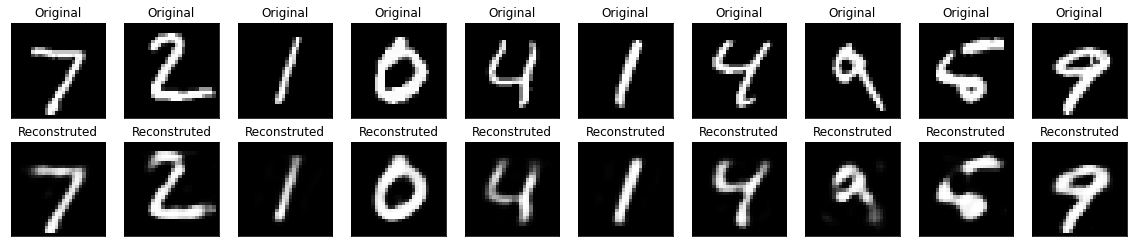

In [22]:
n = 10  # number od digits
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.title("Reconstruted")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()